## SVM model comparison with different clusters and test wth picture extraction

### Load Data

In [2]:
import numpy as np

data = np.load('mnist.npz')
data.items

<bound method Mapping.items of NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test>

### Train and Test Data 

In [3]:
(x_train, y_train) = data['x_train'], data['y_train']
(x_test, y_test) = data['x_test'], data['y_test']


In [4]:
x_all = np.concatenate((x_train, x_test))
y_all = np.concatenate((y_train, y_test))


#### check the shapes

In [5]:
print(x_all.shape)
print(y_all.shape)

(70000, 28, 28)
(70000,)


3


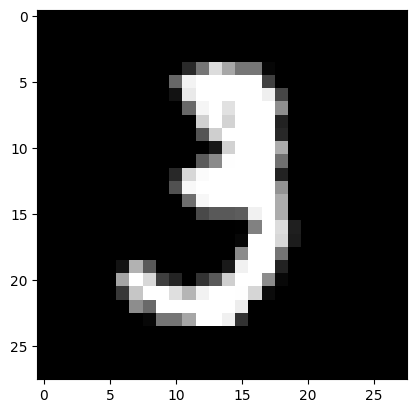

In [6]:
import matplotlib.pyplot as plt
print(y_all[10])
plt.imshow(x_all[10], cmap='gray')

### Reshape Data and Normalization

In [7]:
x_all = x_all.reshape((-1,784)).astype('float32') / 255


In [8]:
print(x_all.shape)

(70000, 784)


### Check different cluster numbers and find the best one from the chart

In [9]:
from sklearn.cluster import KMeans

import numpy as np
cluster_reange = np.arange(1,21)
cluster_results = []

for i in cluster_reange:
    model = KMeans(i)
    model.fit(x_all, y_all)
    cluster_results.append(np.abs(model.score(x_all, y_all)))

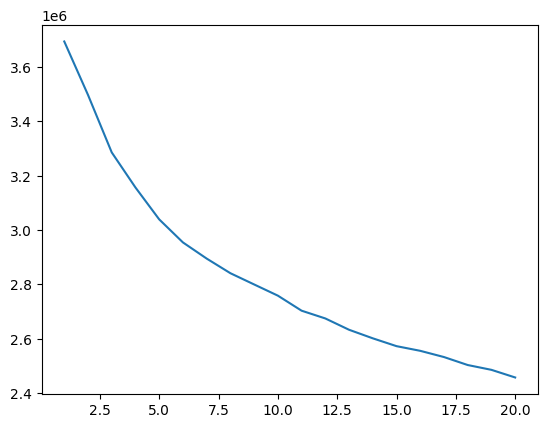

In [10]:
import matplotlib.pyplot as plt

plt.plot(cluster_reange,cluster_results)
plt.show()

In [11]:
best_cluster_number = 8

### Cluster data with KMeans Model

In [12]:
k_means = KMeans(n_clusters=8)

In [13]:
k_means.fit(x_all)

KMeans()

### Save Model

In [14]:
import pickle

with open('k_means_model.pkl', 'wb') as f:
    pickle.dump(k_means, f)

In [15]:
x_all[1].shape

(784,)

#### define essentional varibles

In [16]:
results = []

### find KMeans scores

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = k_means.predict(x_all)

k_means_score = k_means.inertia_

result = {
    'model': k_means,
    'score': k_means_score,
}

results.append(result)
print(k_means_score)


2841200.25


### Train Each cluster with SVM model and get each score

In [19]:
from sklearn.svm import SVC

for i in range(best_cluster_number):
    svm = SVC()
    svm.fit(x_all[k_means.labels_ == i], y_all[k_means.labels_ == i])
    this_score = svm.score(x_all[k_means.labels_ == i], y_all[k_means.labels_ == i])

    result = {
        'model': f'svm_{i}',
        'score': this_score
    }
    with open(f'svm_model{i}.pkl', 'wb') as f:
        pickle.dump(svm, f)

    results.append(result)

### Convert Results to Dateframe

In [20]:
import pandas as pd

dataset = pd.DataFrame(results)

In [21]:
dataset

,model,score
0,KMeans(),2.841200e+06
1,svm_0,9.871721e-01
2,svm_1,9.873755e-01
3,svm_2,9.902340e-01
4,svm_3,9.907436e-01
5,svm_4,9.927414e-01
6,svm_5,9.879032e-01
7,svm_6,9.880695e-01
8,svm_7,9.872971e-01


### Show on Plot

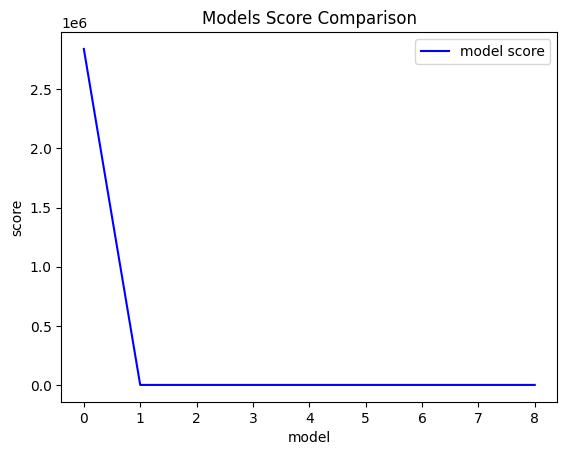

In [22]:
plt.title('Models Score Comparison')
plt.plot(dataset['score'], 'b', label='model score')
plt.xlabel('model')
plt.ylabel('score')
plt.legend()
plt.show()

### SVM data results on plot

In [25]:
svm_dataset = dataset[1:]
svm_dataset

,model,score
1,svm_0,0.987172
2,svm_1,0.987376
3,svm_2,0.990234
4,svm_3,0.990744
5,svm_4,0.992741
6,svm_5,0.987903
7,svm_6,0.988070
8,svm_7,0.987297


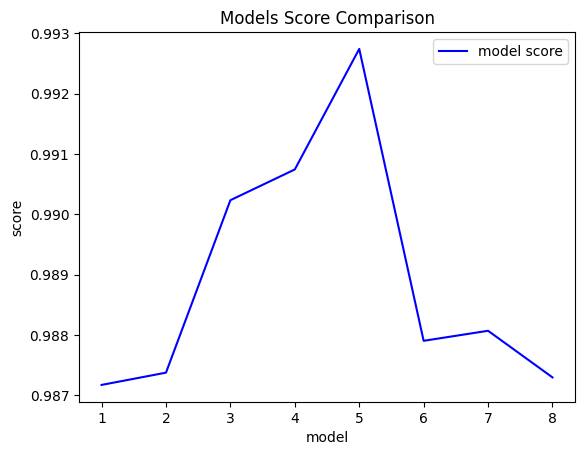

In [26]:
plt.title('Models Score Comparison')
plt.plot(svm_dataset['score'], 'b', label='model score')
plt.xlabel('model')
plt.ylabel('score')
plt.legend()
plt.show()